In [14]:
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.models import model

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

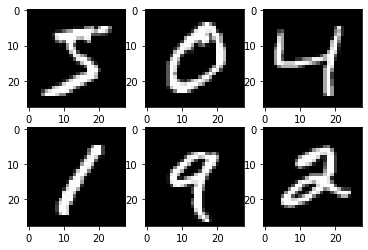

In [16]:
#plot six samples of mnist


for i in range(6):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [17]:
# #reshape [samp][wdth][hght][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [18]:
# covert class vector to binary class

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train / 255
X_test = X_test / 255

In [19]:

def create_model():

    num_classes = 10
    model = Sequential()
    model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
    model = create_model()
    print("Create model")


In [20]:

model = create_model()
print("Create model")
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
print("The model has successfully trained.")

Create model
Epoch 1/10
300/300 - 8s - loss: 0.2212 - accuracy: 0.9326 - val_loss: 0.0469 - val_accuracy: 0.9851
Epoch 2/10
300/300 - 7s - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 3/10
300/300 - 8s - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0276 - val_accuracy: 0.9905
Epoch 4/10
300/300 - 7s - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0315 - val_accuracy: 0.9888
Epoch 5/10
300/300 - 8s - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 6/10
300/300 - 7s - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0239 - val_accuracy: 0.9918
Epoch 7/10
300/300 - 8s - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0272 - val_accuracy: 0.9917
Epoch 8/10
300/300 - 8s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0268 - val_accuracy: 0.9913
Epoch 9/10
300/300 - 8s - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0253 - val_accuracy: 0.9925
Epoch 10/10
300/300 - 8s - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0279 - val_acc

In [21]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.93%


In [22]:
model.save('digit.h5')
del model
print("The model has successfully saved.")

The model has successfully saved.
